In [1]:
import spacec as sp
import os
import warnings
import numpy as np
import scanpy as sc
import matplotlib

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80, facecolor='white') 
matplotlib.rcParams["image.cmap"] = 'viridis'

/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
root_path = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity" 
data_path = '/Users/arcz/Desktop/research/allo immunity/example_data' 


output_dir = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves"
os.makedirs(output_dir, exist_ok=True)

In [3]:
file = 'tonsil_tma.tif' 
file_path = "/Users/arcz/Desktop/research/allo immunity/example_data/raw/tonsil_tma.tif"

#### Downscale CODEX images


Reading in the qptiff file, might take awhile!
Loaded nuclear image of dimension (Y,X) = (3139, 5865)


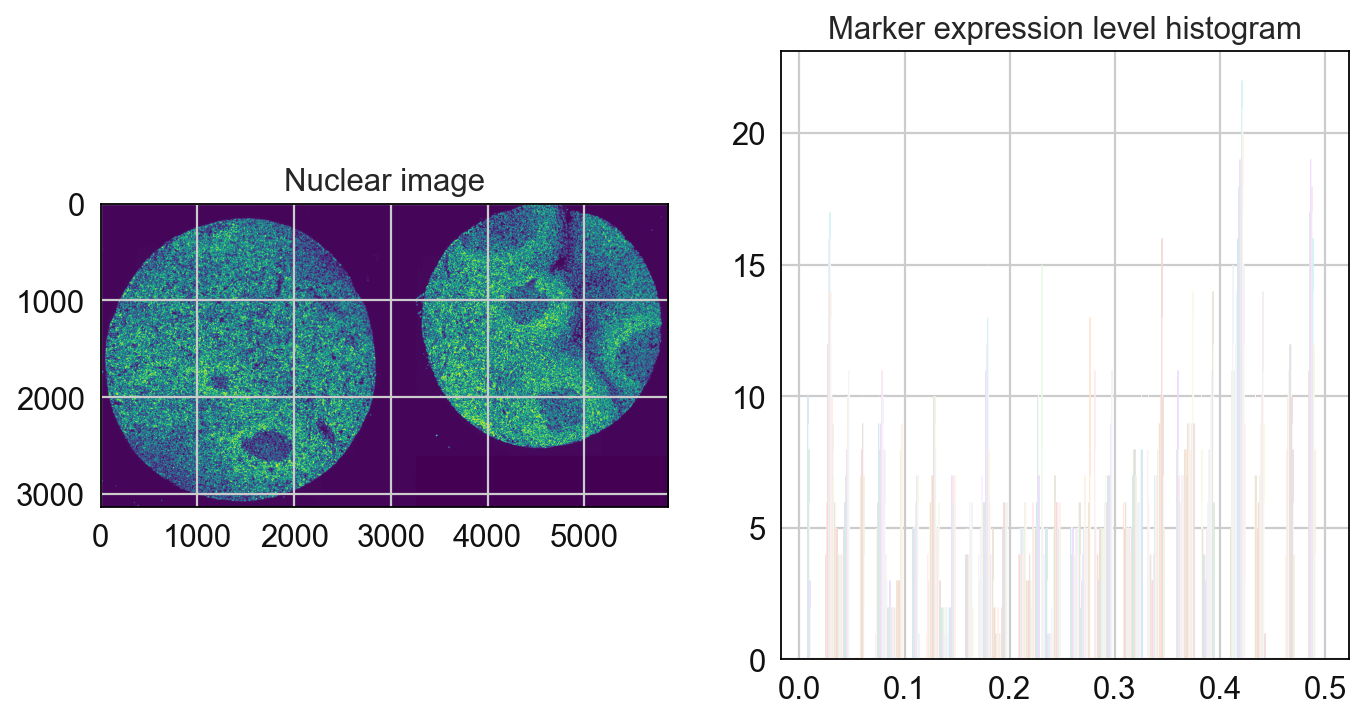

returning scaled down image!


In [4]:
resized_im = sp.hf.downscale_tissue(
    file_path = file_path, # where qptiff or tiff is stored
    downscale_factor = 64, # the downscale factor for the image
    padding = 50, # the padding to add to the image
    output_dir = output_dir # where to store the downscale image
)


#### Segment individual tissue pieces


Identified 2 tissue pieces


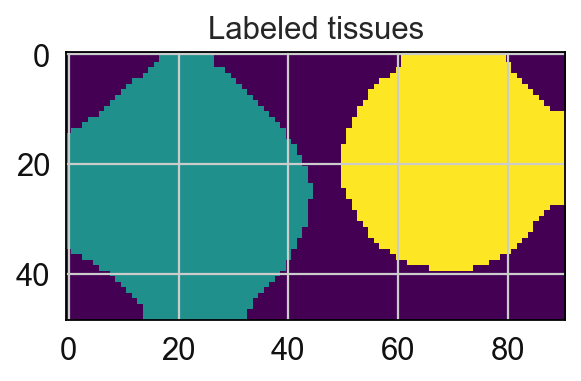

Saving the labels from the segmentation!


In [5]:
tissueframe = sp.tl.label_tissue(
    resized_im, # the downsampled image
    lower_cutoff = 0.2, #the lower cutoff of the image intensity for the tissue
    upper_cutoff = 0.21 #the upper cutoff of the image intensity for the tissue                     
)

In [6]:
tissueframe.head()

,tissue,y,x,region1
0,1,0,17,1
1,1,0,18,1
2,1,0,19,1
3,1,0,20,1
4,1,0,21,1


#### Rename tissue number (optional)


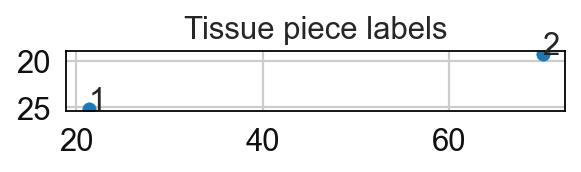

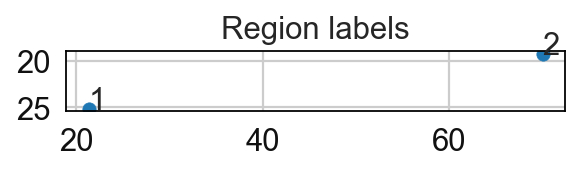

In [7]:
# Manually assign the tissue pieces to the regions
sp.pl.tissue_lables(
    tissueframe=tissueframe, #the data frame with pixel assignment to each tissue piece or region
    region = 'region1'
)

#### Extract individual labeled tissue


Reading in the qptiff file, might take awhile!


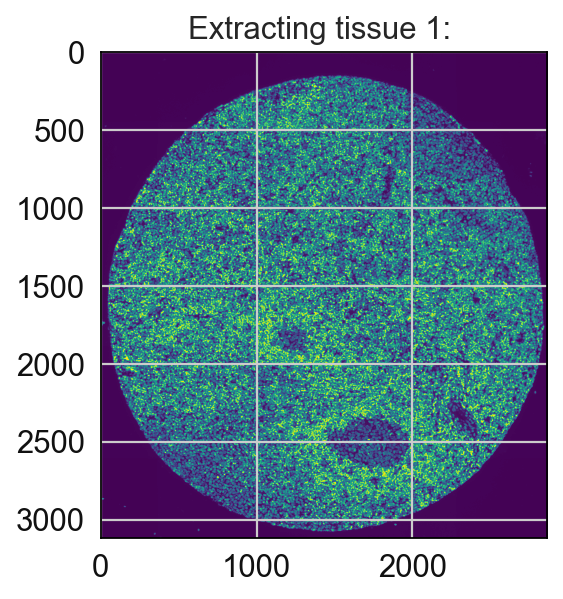

Saving tissue image at /Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/reg001_X01_Y01_Z01.tif


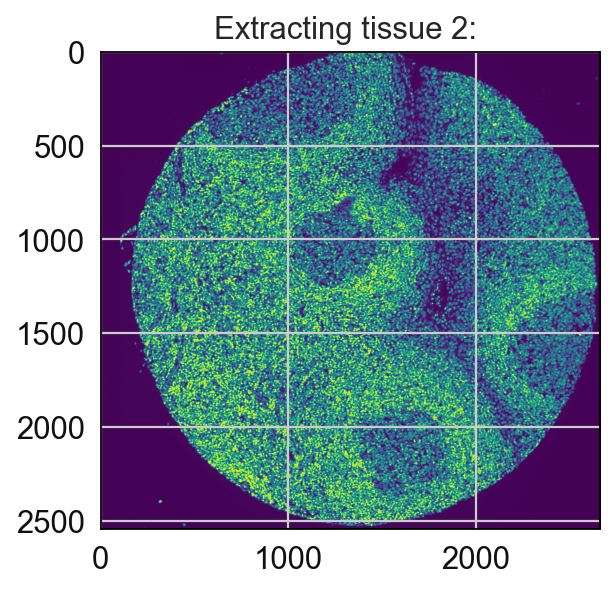

Saving tissue image at /Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/reg002_X01_Y01_Z01.tif


In [8]:
sp.tl.save_labelled_tissue(
    filepath=file_path, 
    tissueframe=tissueframe, # the data frame with pixel assignment to each tissue piece or region
    output_dir = output_dir, # where to store the image
    downscale_factor = 64, # the downscale factor for the image
    region = 'region1', 
    padding = 50 # the padding to add to the image
)